### Imports and configurations

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

URL = "bestsellers with categories.csv"
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,4)})

### Read the csv file

In [73]:
df = pd.read_csv(URL)
df.index += 1

### Output the first five lines

In [74]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Display the dimensions of the dataset

In [75]:
df.shape

(550, 7)

### How many books does the dataset store? Answer: 550

## Primary data analysis

### Check if all rows have enough data

In [76]:
nan_count = df.isna().sum()
print(nan_count)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


### Are there gaps in any variables? Answer: Yes

### Check what are the unique values in the genre column

In [77]:
df.Genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### What are the unique genres? Answer: 'Non Fiction' and 'Fiction'

### Now look at the price distribution: make a histogram

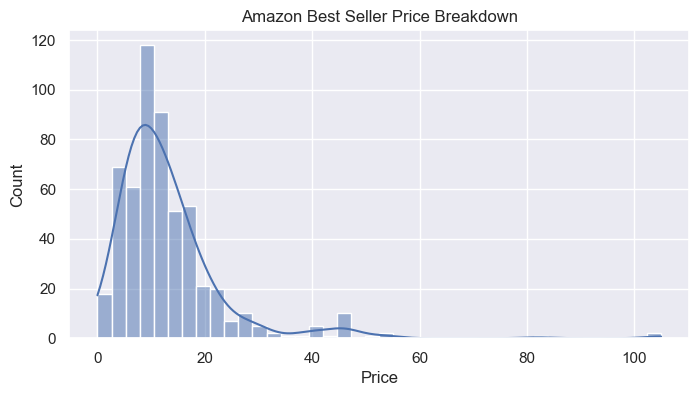

In [78]:
data = df.Price
# sns.relplot(x='Price', kind='hist', data=df)
sns.histplot(data=df, x="Price", bins=40, kde=True).set(title='Amazon Best Seller Price Breakdown')
plt.show()

### Determine what our maximum, minimum, average, median price is

### Maximum price? Answer: &105

In [79]:
df.Price.max()

105

### Minimum price? Answer: $0

In [80]:
df.Price.min()

0

### Average price? Answer: &13.1

In [81]:
df.Price.mean()

13.1

### Median price? Answer: $11.0

In [82]:
df.Price.median()

11.0

## Search and sort data

### What is the highest rating in the dataset? Answer: 4.9

In [83]:
df["User Rating"].max()

4.9

### How many books have this rating? Answer: 52

In [84]:
df[df["User Rating"] == df["User Rating"].max()].shape

(52, 7)

### Which book has the most reviews? Answer: 'Where the Crawdads Sing'

In [85]:
df.loc[df.Reviews.idxmax()]

Name           Where the Crawdads Sing
Author                     Delia Owens
User Rating                        4.8
Reviews                          87841
Price                               15
Year                              2019
Genre                          Fiction
Name: 535, dtype: object

### Of the books that made it to the Top 50 in 2015, which book is the most expensive? Answer: 'Publication Manual of the American Psychological Association, 6th Edition'

In [86]:
bs_2015 = df[df.Year == 2015]
bs_2015.loc[bs_2015.Price.idxmax()]

Name           Publication Manual of the American Psychologic...
Author                        American Psychological Association
User Rating                                                  4.5
Reviews                                                     8580
Price                                                         46
Year                                                        2015
Genre                                                Non Fiction
Name: 278, dtype: object

### How many Fiction books were in the Top 50 in 2010? Answer: 20

In [87]:
df[(df.Year == 2010) & (df.Genre == "Fiction")].shape

(20, 7)

### How many books rated 4.9 were ranked in 2010 and 2011? Answer: 1

In [88]:
df[(df["User Rating"] == 4.9) & (df.Year == 2010 | 2011)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


### Sort by increasing price all the books that made the ranking in 2015 and cost less than $8

In [89]:
bd_2015 = df[(df.Year == 2015) & (df.Price < 8)].sort_values("Price", ascending=True)
bd_2015.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
211,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
207,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
112,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
124,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction


### Which book is last in the sorted list? Answer: 'Old School (Diary of a Wimpy Kid #10)'

In [90]:
bd_2015.iloc[-1]

Name           Old School (Diary of a Wimpy Kid #10)
Author                                   Jeff Kinney
User Rating                                      4.8
Reviews                                         6169
Price                                              7
Year                                            2015
Genre                                        Fiction
Name: 254, dtype: object

## Aggregation of data and connection of tables

### Get the maximum and minimum prices for each of the genres

In [91]:
gr_genre = df[["Price", "Genre"]].groupby("Genre", sort=True)
price = gr_genre.agg(["min", "max"])
print(price)

            Price     
              min  max
Genre                 
Fiction         0   82
Non Fiction     0  105


### The maximum price for the genre Fiction. Answer: $82

### Minimum price for Fiction genre. Answer: $0

### Answer: Maximum price for Non Fiction genre. Answer: $105

### Minimum price for Non Fiction genre. Answer: $0

### Create a new dataframe that will hold the number of books for each author

In [92]:
gr_authors = df.groupby("Author", sort=True)
authors = gr_authors.agg({"Author": "count"})
authors.rename(columns={"Author": "Number"}, inplace=True)
authors.head()

,Number
Author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


### What is the size of the table? Answer: 248

In [93]:
authors.shape

(248, 1)

### Which author has the most books? Answer: Jeff Kinney

In [94]:
authors.loc[authors.idxmax()]

,Number
Author,
Jeff Kinney,12


### How many books by this author? Answer: 12

### Create a second dataframe that will hold the average rating for each author

In [95]:
rating = gr_authors.agg({"User Rating": "mean"})
rating.head()

,User Rating
Author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


### Which author has the lowest average rating? Answer: Donna Tartt

In [96]:
rating.loc[rating.idxmin()]

,User Rating
Author,
Donna Tartt,3.9


### What is the average rating of this author? Answer: 3.9

### Concatenate the last two dataframes so that the number of books and the average rating are visible for each author. Save the result to a variable

In [97]:
rated_authors = pd.concat([authors, rating], axis=1)
rated_authors.head()

,Number,User Rating
Author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


### Sort the dataframe by increasing number of books and increasing rating (use the sort_values function)

In [98]:
rated_authors.sort_values(["Number", "User Rating"], ascending=True, inplace=True)
rated_authors.head()

,Number,User Rating
Author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


### Which author is first on the list? Answer: Muriel Barbery

In [99]:
rated_authors.iloc[0]

Number         1.0
User Rating    4.0
Name: Muriel Barbery, dtype: float64

## Visualization

### User Rating Variation over Time

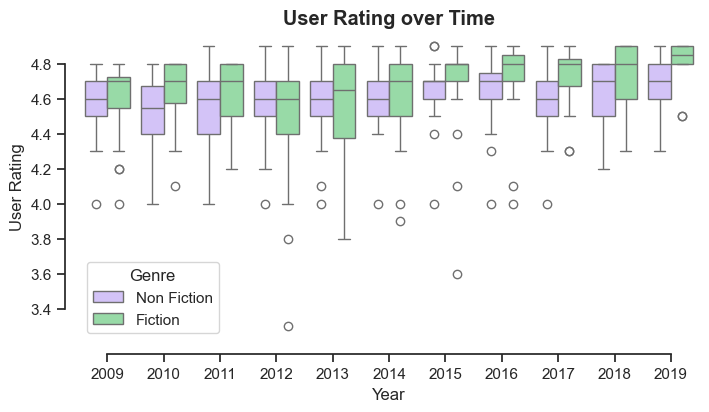

In [100]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Year", y="User Rating", hue="Genre", palette=["m", "g"], data=df).set_title(
    "User Rating over Time", fontdict={"size": "large", "weight": "bold"}
)
sns.despine(offset=10, trim=True)

### User Rating by Genre

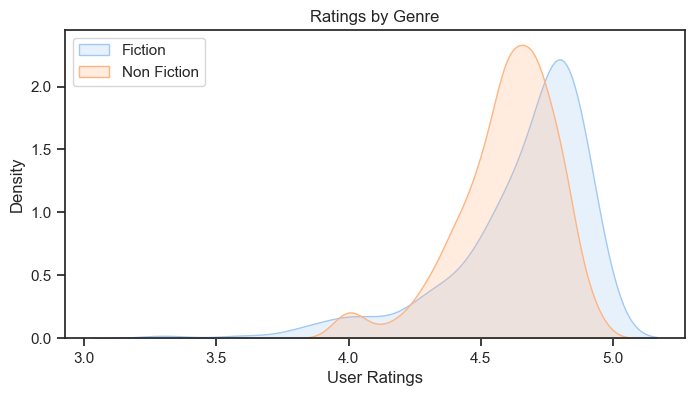

In [101]:
sns.kdeplot(df["User Rating"][df["Genre"] == "Fiction"], fill=True)
sns.kdeplot(df["User Rating"][df["Genre"] == "Non Fiction"], fill=True).set(
    title="Ratings by Genre"
)
plt.xlabel("User Ratings")
legend = plt.legend(labels=["Fiction", "Non Fiction"], loc="upper left")
legend.get_frame().set_facecolor("white")
plt.show()

### Price Breakdown by User Rating

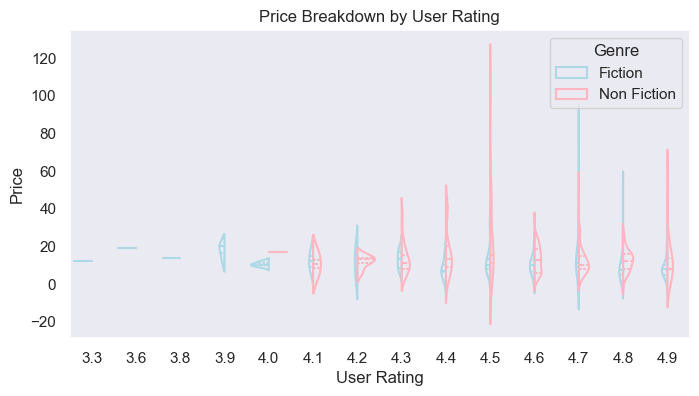

In [106]:
sns.set_theme(style="dark")

vio = sns.violinplot(
    data=df,
    x="User Rating",
    y="Price",
    hue="Genre",
    split=True,
    inner="quartile",
    fill=False,
    palette=["lightblue", "lightpink"],
).set(title="Price Breakdown by User Rating")
plt.show()